In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

import math


### A cubic zirconia manufacturer has a dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. Our task is to predict the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, to provide the best 5 attributes that are most important.

## Univariate, Bivariate Analysis and Exploratory Data Analysis.

In [2]:
df1 = pd.read_csv("cubic_zirconia.csv")

In [3]:
df1.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df1.shape

(26967, 11)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
Unnamed: 0    26967 non-null int64
carat         26967 non-null float64
cut           26967 non-null object
color         26967 non-null object
clarity       26967 non-null object
depth         26270 non-null float64
table         26967 non-null float64
x             26967 non-null float64
y             26967 non-null float64
z             26967 non-null float64
price         26967 non-null int64
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [6]:
df1.describe(include='all')

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,13484.000000,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


In [7]:
df1.isna().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [8]:
df1.duplicated().any()

False

In [9]:
df1.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [10]:
df1.quantile(.75)-df1.quantile(.25)

Unnamed: 0    13483.00
carat             0.65
depth             1.50
table             3.00
x                 1.84
y                 1.83
z                 1.14
price          4415.00
dtype: float64

In [11]:
df1.var()

Unnamed: 0    6.060384e+07
carat         2.282407e-01
depth         1.996174e+00
table         4.982127e+00
x             1.273549e+00
y             1.359690e+00
z             5.192984e-01
price         1.619954e+07
dtype: float64

In [12]:
df1.skew()

Unnamed: 0    0.000000
carat         1.116481
depth        -0.028618
table         0.765758
x             0.387986
y             3.850189
z             2.568257
price         1.618550
dtype: float64

(array([1, 2, 3, 4, 5, 6, 7, 8]), <a list of 8 Text xticklabel objects>)

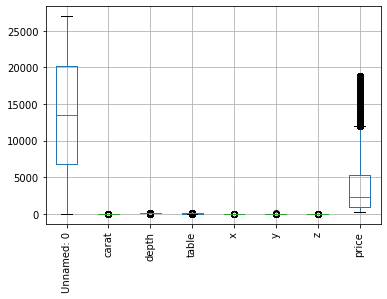

In [13]:
df1.boxplot()
plt.xticks(rotation=90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC86217A08>,
      dtype=object)

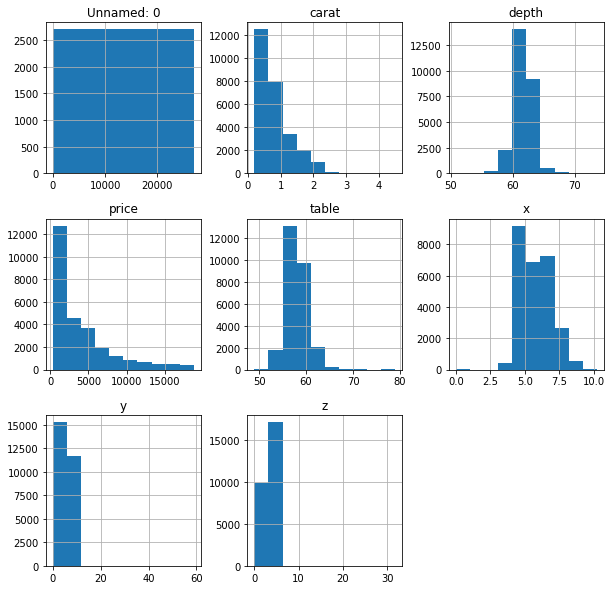

In [14]:
df1.hist(figsize=(10,10))

C:\Users\nlokesh\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\nlokesh\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


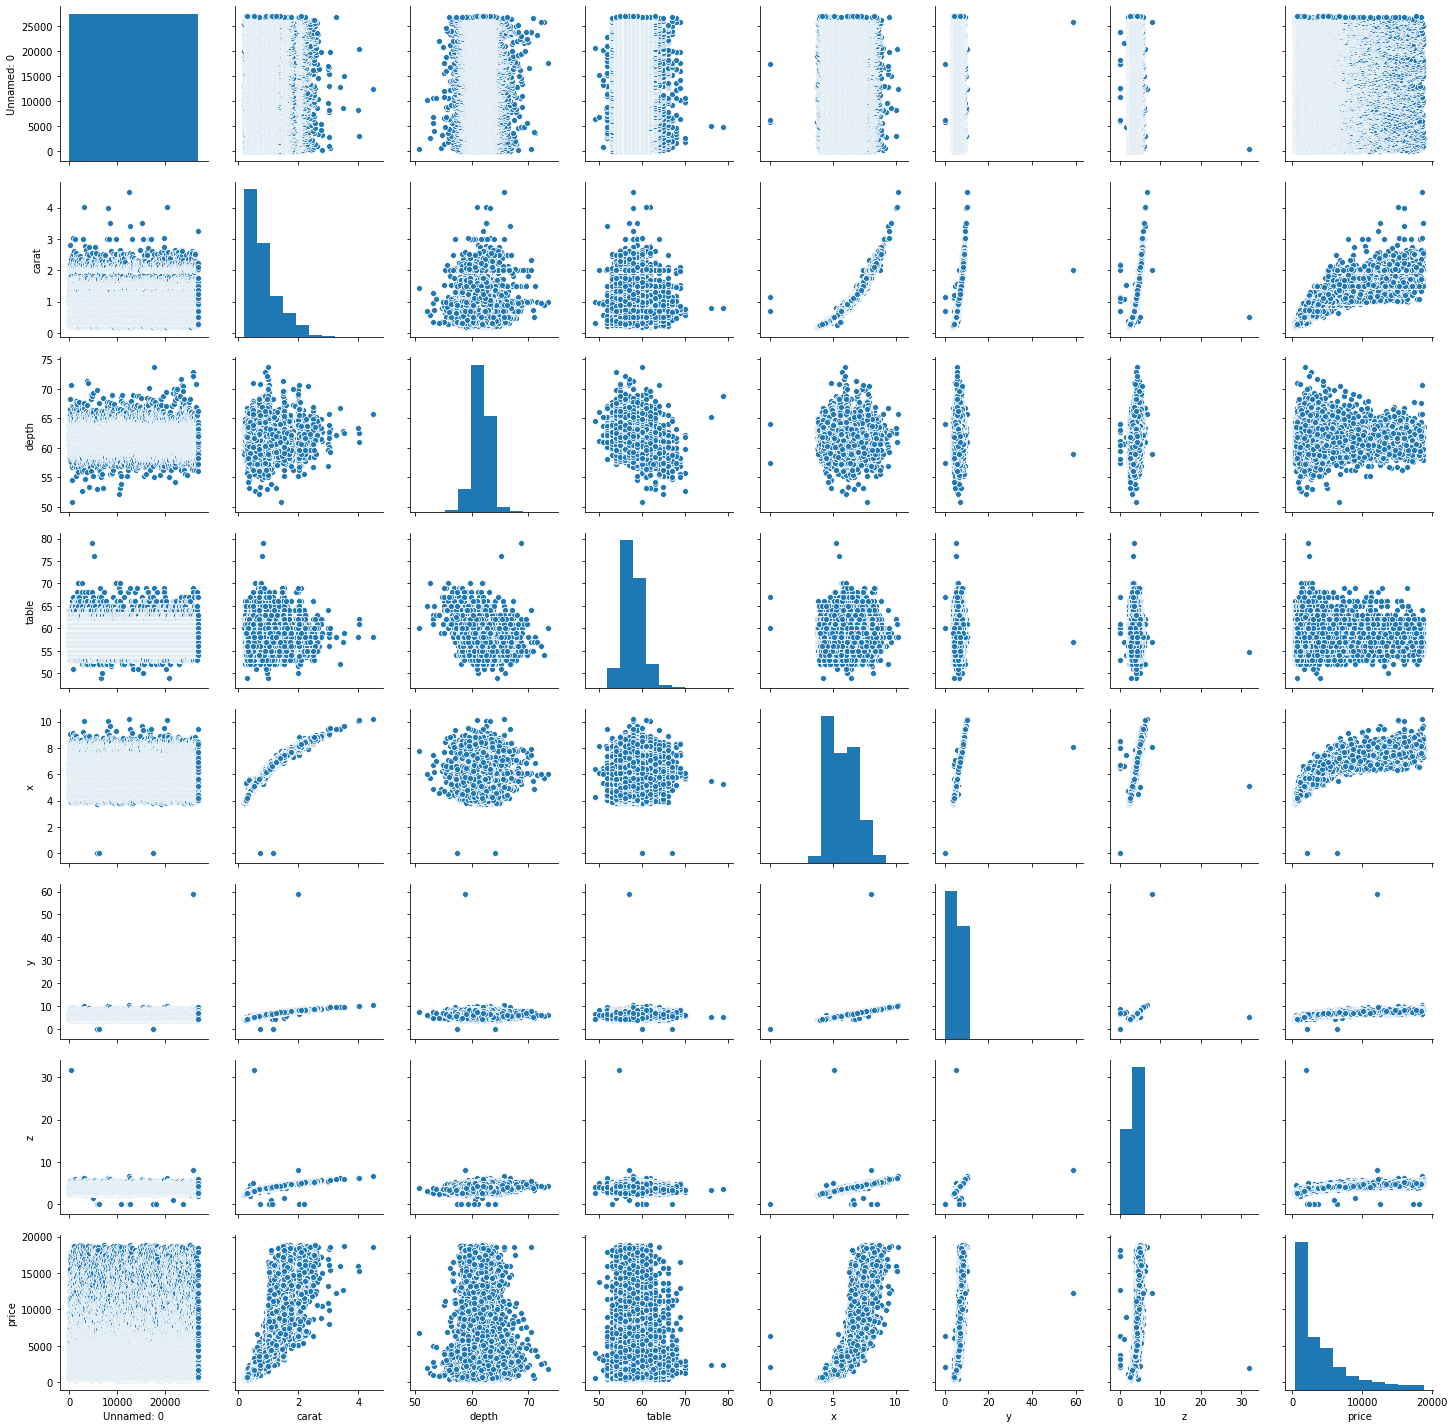

In [23]:
sns.pairplot(df1)

In [15]:
df1.cov()

,Unnamed: 0,carat,depth,table,x,y,z,price
Unnamed: 0,6.060384e+07,12.978981,-17.458374,66.324405,40.641354,62.130324,9.429493,8.304578e+04
carat,1.297898e+01,0.228241,0.023844,0.193742,0.526403,0.524250,0.323839,1.773678e+03
depth,-1.745837e+01,0.023844,1.996174,-0.939265,-0.029813,-0.040760,0.100411,-1.459691e+01
table,6.632440e+01,0.193742,-0.939265,4.982127,0.494228,0.474596,0.239574,1.140420e+03
x,4.064135e+01,0.526403,-0.029813,0.494228,1.273549,1.266851,0.777946,4.025446e+03
y,6.213032e+01,0.524250,-0.040760,0.474596,1.266851,1.359690,0.780563,4.018538e+03
z,9.429493e+00,0.323839,0.100411,0.239574,0.777946,0.780563,0.519298,2.466906e+03
price,8.304578e+04,1773.677848,-14.596911,1140.419986,4025.446081,4018.537829,2466.905683,1.619954e+07


In [16]:
df1.corr()

,Unnamed: 0,carat,depth,table,x,y,z,price
Unnamed: 0,1.000000,0.003490,-0.001588,0.003817,0.004626,0.006844,0.001681,0.002650
carat,0.003490,1.000000,0.035364,0.181685,0.976368,0.941071,0.940640,0.922416
depth,-0.001588,0.035364,1.000000,-0.298011,-0.018715,-0.024735,0.101624,-0.002569
table,0.003817,0.181685,-0.298011,1.000000,0.196206,0.182346,0.148944,0.126942
x,0.004626,0.976368,-0.018715,0.196206,1.000000,0.962715,0.956606,0.886247
y,0.006844,0.941071,-0.024735,0.182346,0.962715,1.000000,0.928923,0.856243
z,0.001681,0.940640,0.101624,0.148944,0.956606,0.928923,1.000000,0.850536
price,0.002650,0.922416,-0.002569,0.126942,0.886247,0.856243,0.850536,1.000000


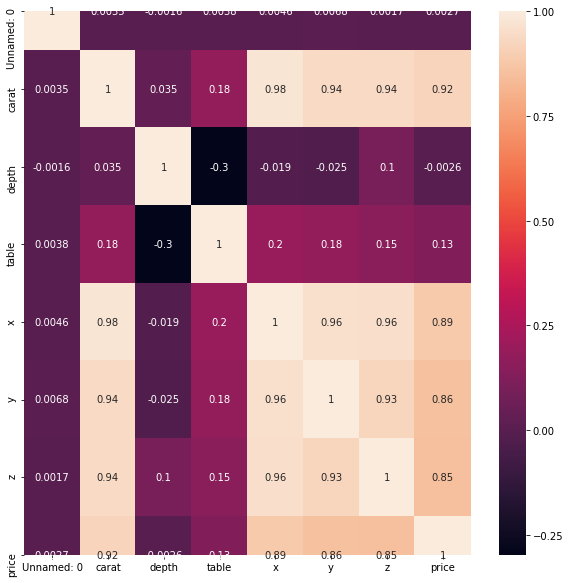

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(), annot=True)


### From the Pairplot and the heatmap, below is the observation of correlation between the variables:
#### •	The dimensions (variables X, Y and Z) of cubic zirconia are highly correlated to each other positively.
#### •	The dimensions are also highly correlated with Carat in the positive direction.
#### •	The dimensions and the Carat of the cubic Zirconia are highly correlated with the output variable Price.


## Null values check and Data preprocessing. Also checking for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check if scaling is necessary in this case.


In [18]:
## Checking for null values:
df1.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

### There are 697 null values in the column Depth. 

### checking the mean and median of the depth column:

In [19]:
df1.depth.mean()

61.745146555006194

In [20]:
df1.depth.median()

61.8

### Both Mean and Median of depth column are almost equal. We can use the median imputation for the null values.

### Imputing null values with the median:


In [21]:
df1.fillna(df1.depth.median(), inplace=True)

In [22]:
df1.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

### Checking for zero values:

In [23]:
new_df = df1[(df1 == 0).any(axis=1)]
new_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
5821,5822,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,6035,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
6215,6216,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
10827,10828,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,12499,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,12690,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,17507,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,18195,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,23759,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


### There are 9 rows containing value of '0'
### All these zeroes are seen in the columns x, y, z
### Since x, y and z are the length, width and height of cubic zirconia, it doesn't make any sence to have the value as zero
### Considering that there are only 9 rows with zero values, we can go ahead and drop them

In [24]:
## Imputing zeroes with NaN values and dropping them
df1.replace(0, np.nan, inplace=True)
df1.dropna(inplace=True)

In [25]:
df1.shape

(26958, 11)

### The indpendent attributes have different units and scales of measurement
### It is always a good practice to scale all the dimensions using z scores or someother method to address the problem of different scales

### The data will be scaled in further steps/questions

## Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.


In [26]:
df1.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

### Droping the 'Unnamed: 0' column as it is not required for our model

In [27]:
df1.drop('Unnamed: 0', axis=1, inplace=True)

### Encode the data having string values for Modelling:

In [28]:
for feature in df1:
    if df1[feature].dtype == 'object':
        df1[feature] = pd.Categorical(df1[feature]).codes

In [29]:
df1.dtypes

carat      float64
cut           int8
color         int8
clarity       int8
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

### Scaling the date using ZScore method:

In [30]:
df1 = df1.apply(zscore)

In [31]:
df1.describe(include='all')

,carat,cut,color,clarity,depth,table,x,y,z,price
count,2.695800e+04,2.695800e+04,2.695800e+04,2.695800e+04,2.695800e+04,2.695800e+04,2.695800e+04,2.695800e+04,2.695800e+04,2.695800e+04
mean,-2.456015e-16,-2.486182e-16,-8.305875e-17,3.975849e-17,6.006524e-15,1.981245e-15,-5.188207e-16,4.517617e-16,3.183479e-16,-5.848665e-17
std,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00
min,-1.252508e+00,-2.494429e+00,-1.527362e+00,-2.222894e+00,-7.852672e+00,-3.789618e+00,-1.775199e+00,-1.738209e+00,-3.439892e+00,-8.978512e-01
25%,-8.337419e-01,-5.416247e-01,-9.412463e-01,-1.063314e+00,-4.639527e-01,-6.522727e-01,-9.053968e-01,-8.771918e-01,-8.905219e-01,-7.439968e-01
50%,-2.055928e-01,-5.416247e-01,2.309850e-01,9.626603e-02,3.819328e-02,-2.040806e-01,-3.559496e-02,-2.905721e-02,-2.680104e-02,-3.885659e-01
75%,5.272479e-01,4.347775e-01,8.171006e-01,6.760560e-01,5.403392e-01,6.923038e-01,7.277005e-01,6.923940e-01,6.976100e-01,3.528680e-01
max,7.750963e+00,1.411180e+00,1.989332e+00,1.835636e+00,8.502940e+00,9.656147e+00,3.993895e+00,4.566285e+01,3.937002e+01,3.698393e+00


### As we can see from the above table, the ZScore scaling is applied successfully where the means of all the columns is 0 and standard deviation is 1

### Splitting the data:

In [32]:
x = df1.drop('price', axis=1)
y = df1.pop('price')

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

### Applying Linear Regrression on the dataset:

In [34]:
linear_reg_model = LinearRegression()

In [146]:
linear_reg_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [147]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, linear_reg_model.coef_[idx]))

The coefficient for carat is 1.3246892181912295
The coefficient for cut is 0.013093459981448966
The coefficient for color is -0.11889912715564042
The coefficient for clarity is 0.1269400057424199
The coefficient for depth is -0.05500369475854898
The coefficient for table is -0.052472462400946544
The coefficient for x is -0.33171719200557825
The coefficient for y is 0.0017697139195367488
The coefficient for z is -0.007403794992948854


In [148]:
intercept = linear_reg_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 2.8253356085574657e-06


### Checking the model score / R^2 value:

#### For training set:

In [150]:
linear_reg_model.score(x_train, y_train)

0.8856461365747297

In [152]:
## checking the MSE
mse_train = np.mean((linear_reg_model.predict(x_train) - y_train)**2)
mse_train

0.11404075266449848

In [155]:
## checking RMSE
rmse_train = math.sqrt(mse_train)
rmse_train

0.3376992044179235

#### For testing set

In [151]:
linear_reg_model.score(x_test, y_test)

0.8917578457722393

In [156]:
## checking the MSE
mse_test = np.mean((linear_reg_model.predict(x_test) - y_test)**2)
mse_test

0.10893329010011009

In [157]:
## checking RMSE
rmse_test = math.sqrt(mse_test)
rmse_test

0.3300504356914411

## Inference: Basis on these predictions, what are the business insights and recommendations.

### Below are the most importance variables for the prediction of price for cubic Zirconia as these have higher weights in the prediction equation:
#### •	carat 
#### •	X
#### •	Clarity
#### •	Color
#### •	Depth
### From the correlations between the different attributes, we can see that the price is highly correlated with the dimensions and the Carat of the Cubic Zirconia.
### The stones with higher dimensions and Carat will give us better profits and these are highly correlated with Price of the stones.
